# CICIDS2017 - Détection avec Random Forest

In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## 🔹 Chargement des données simulées

In [11]:
sample_data = {'Protocol': ['TCP', 'UDP', 'TCP', 'ICMP', 'UDP'], 'Src Port': [12345, 53, 443, 0, 67], 'Dst Port': [80, 80, 22, 8, 53], 'Flow Duration': [10000, 5000, 20000, 15000, 8000], 'Tot Fwd Pkts': [10, 5, 20, 15, 8], 'Tot Bwd Pkts': [15, 3, 25, 10, 9], 'Label': ['BENIGN', 'BENIGN', 'DoS', 'BENIGN', 'DoS']}
df = pd.DataFrame(sample_data)
df.head()

,Protocol,Src Port,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,Label
0,TCP,12345,80,10000,10,15,BENIGN
1,UDP,53,80,5000,5,3,BENIGN
2,TCP,443,22,20000,20,25,DoS
3,ICMP,0,8,15000,15,10,BENIGN
4,UDP,67,53,8000,8,9,DoS


## 🔹 Encodage des variables catégorielles

In [12]:
label_enc_protocol = LabelEncoder()
df['Protocol'] = label_enc_protocol.fit_transform(df['Protocol'])

label_enc_label = LabelEncoder()
df['Label'] = label_enc_label.fit_transform(df['Label'])


## 🔹 Séparation des features et de la cible + normalisation

In [13]:
X = df.drop(columns=['Label'])
y = df['Label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🔹 Séparation des données en train/test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

## 🔹 Entraînement du modèle Random Forest

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 🔹 Prédiction et évaluation du modèle

In [16]:
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\HARRATA Mohamed\Documents\Projects\SIEM intelligent\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HARRATA Mohamed\Documents\Projects\SIEM intelligent\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HARRATA Mohamed\Documents\Projects\SIEM intelligent\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

## 🔹 Affichage de la matrice de confusion

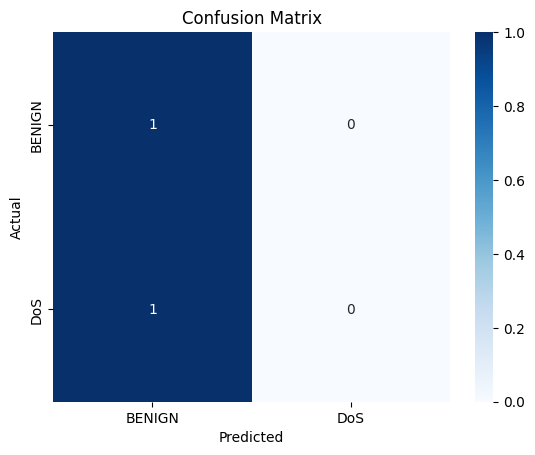

In [17]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['BENIGN', 'DoS'], yticklabels=['BENIGN', 'DoS'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()